In [2]:
import numpy as np

# METODO DE GAUSS-SIDEL


In [46]:
#METODO DE GAUSS-SIDEL

def gauss_seidel(A, b, x0, tol, max_iterations):

    n = A.shape[0]
    x = x0.copy()
    
    for k in range(max_iterations):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        
        print(f"Iteración {k+1}: {x_new}")
        print(np.linalg.norm(x_new - x, ord=np.inf)/ np.linalg.norm(x_new, ord=np.inf))
        
        # Verificar la convergencia
        if np.linalg.norm(x_new - x, ord=np.inf)/ np.linalg.norm(x_new, ord=np.inf) < tol:
            return x_new
        
        x = x_new
    
    raise Exception("Gauss-Seidel no convergió después de {} iteraciones".format(max_iterations))


In [47]:
#EJEMPLO

A = np.array([[10,8,9],[5,10,4],[2,4,8]], dtype=float)
b = np.array([170,117,98], dtype=float)
x0 = np.array([4,4,5],  dtype=float)
tol = 1e-4
nmax = 100

x = gauss_seidel(A, b, x0, tol, nmax)
print(x)

Iteración 1: [9.3  5.05 7.4 ]
0.5698924731182796
Iteración 2: [6.3  5.59 7.88]
0.3807106598984773
Iteración 3: [5.436 5.83  7.976]
0.1083249749247743
Iteración 4: [5.1576 5.9308 7.9952]
0.03482089253552137
Iteración 5: [5.05968 5.97208 7.99904]
0.012241468976277071
Iteración 6: [5.0232   5.988784 7.999808]
0.004560109442626631
Iteración 7: [5.0091456 5.995504  7.9999616]
0.0017568084326805907
Iteración 8: [5.00363136 5.99819968 7.99999232]
0.0006892806617093386
Iteración 9: [5.001447168 5.999279488 7.999998464]
0.00027302405242057317
Iteración 10: [5.000577792  5.9997117184 7.9999996928]
0.00010867200417309232
Iteración 11: [5.0002309018 5.999884672  7.9999999386]
4.3361280332946296e-05
[5.0002309018 5.999884672  7.9999999386]


# METODO DE JACOBI


In [41]:
#METODO JACOBI

def jacobi(A, b, x0, tol, max_iterations):

    n = A.shape[0]
    x = x0.copy()
    
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
       
        print(f"Iteración {k+1}: {x_new}")
        print(np.linalg.norm(x_new - x, ord=np.inf)/ np.linalg.norm(x_new, ord=np.inf))
        
        # Verificar la convergencia
        if np.linalg.norm(x_new - x, ord=np.inf)/ np.linalg.norm(x_new, ord=np.inf) < tol:
            return x_new
        
        x = x_new
    
    raise Exception("Jacobi no convergió después de {} iteraciones".format(max_iterations))



In [42]:
A = np.array([[10,8,9],[5,10,4],[2,4,8]], dtype=float)
b = np.array([170,117,98], dtype=float)
x0 = np.array([4,4,5],  dtype=float)
tol = 1e-4
nmax = 100

x = jacobi(A, b, x0, tol, nmax)
print(x)


Iteración 1: [9.3  7.7  9.25]
0.5698924731182796
Iteración 2: [2.515 3.35  6.075]
1.1168724279835391
Iteración 3: [8.8525  8.0125  9.94625]
0.637174814628629
Iteración 4: [1.638375 3.29525  6.030625]
1.1962483158876565
Iteración 5: [ 8.9362375   8.4685625  10.19278125]
0.7159834319018666
Iteración 6: [1.051646875 3.15476875  5.781659375]
1.3637245146424763
Iteración 7: [ 9.2726915625  8.8615128125 10.4097039062]
0.7897481774254955
Iteración 8: [0.5420562344 2.8997726562 5.5010707031]
1.5870792795237796
Iteración 9: [ 9.7292182422  9.2285436016 10.6645996133]
0.8614633779941618
Iteración 10: [0.0190254668 2.5695510336 5.2034236387]
1.8661161284705732
Iteración 11: [10.2612778983  9.6091178111 10.9604681165]
0.9344721705910531
Iteración 12: [-0.5517155538  2.1851738042  4.8801216199]
2.215722126286813
Iteración 13: [10.8597514987 10.0238091289 11.2953419863]
1.010280792411669
Iteración 14: [-1.1848550908  1.7519874561  4.5231575608]
2.662875751630762
Iteración 15: [11.5275682304 10.48316

Exception: Jacobi no convergió después de 100 iteraciones

# Método SOR

In [ ]:
import numpy as np

def sor(A, b, x0, omega, tol=1e-10, max_iterations=1000):
    """
    Resuelve el sistema lineal Ax = b usando el método de relajación SOR.

    Parámetros:
    - A (np.array): Matriz de coeficientes del sistema.
    - b (np.array): Vector de términos independientes del sistema.
    - x0 (np.array): Vector inicial para las iteraciones.
    - omega (float): Parámetro de relajación.
    - tol (float): Tolerancia para el criterio de convergencia.
    - max_iterations (int): Número máximo de iteraciones permitidas.
    
    Retorna:
    - x (np.array): Solución del sistema Ax = b.
    """
    n = A.shape[0]
    x = x0.copy()
    
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            sigma1 = np.dot(A[i, :i], x_new[:i])
            sigma2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - sigma1 - sigma2)
        
        # Imprimir la iteración actual y el vector de solución aproximada con decimales
        np.set_printoptions(precision=10, suppress=True)
        print(f"Iteración {k+1}: {x_new}")
        
        # Verificar la convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        
        x = x_new
    
    raise Exception("SOR no convergió después de {} iteraciones".format(max_iterations))

# Ejemplo de uso
A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]], dtype=float)
b = np.array([15, 10, 10], dtype=float)
x0 = np.zeros_like(b)
omega = 1.25

# Solucionar usando el método de relajación SOR
solucion = sor(A, b, x0, omega)
print("La solución es:", solucion)


# Método de Descenso Más Rápido

In [22]:
#METODO DE GRADIENTE DESCENDENTE
import numpy as np

def gradiente_descendente(A, b, x0, tol=1e-5, max_iterations=1000):
    """
    Resuelve el sistema lineal Ax = b usando el método del descenso más rápido.
    
    Parámetros:
    - A (np.array): Matriz de coeficientes del sistema.
    - b (np.array): Vector de términos independientes del sistema.
    - x0 (np.array): Vector inicial para las iteraciones.
    - tol (float): Tolerancia para el criterio de convergencia.
    - max_iterations (int): Número máximo de iteraciones permitidas.
    
    Retorna:
    - x (np.array): Solución del sistema Ax = b.
    """
    x = x0.copy()
    r = b - np.dot(A, x)
    
    for k in range(max_iterations):
        
        # Calcular el nuevo residual
        #r = r - alpha_k * np.dot(A, r)
        r = b - np.dot(A, x)
        
        # Calcular el tamaño del paso α_k
        alpha_k = np.dot(r, r) / np.dot(r, np.dot(A, r))
        
        # Actualizar la solución
        x = x + alpha_k * r
        
        # Imprimir la iteración actual y el vector de solución aproximada con decimales
        print(f"Iteración {k+1}: x = {x}, t = {alpha_k}  Residual = {r}")
        
        # Verificar la convergencia
        if np.linalg.norm(r) < tol:
            return x
    
    raise Exception("El método del descenso más rápido no convergió después de {} iteraciones".format(max_iterations))

# Definir la matriz A y el vector b
A = np.array([
    [0, 0, 1],
    [64, 8, 1],
    [256, 16, 1]
], dtype=float)
b = np.array([0, 320, 0], dtype=float)

# Multiplicar por A^T para obtener la nueva matriz y vector
A_T = A.T
A_new = np.dot(A_T, A)
b_new = np.dot(A_T, b)

# Vector inicial
x0 = np.array([-5.05, 80.05, 0], dtype=float)
solucion = gradiente_descendente(A_new, b_new, x0)
print("La solución es:", solucion)

Iteración 1: x = [-5.0035134272 80.0530655516  0.0002116146], t = 1.429828148720949e-05  Residual = [3251.2  214.4   14.8]
Iteración 2: x = [-5.0000951067 80.0018946197 -0.0094232413], t = 0.06427034885768933  Residual = [ 0.0531865872 -0.7961825756 -0.1499113677]
Iteración 3: x = [-5.0000821297 80.0018954509 -0.0094230521], t = 1.4299764441847144e-05  Residual = [0.9075005999 0.0581312427 0.0132330009]
Iteración 4: x = [-5.0000831023 80.0016598352 -0.0083213178], t = 0.12160652611334774  Residual = [-0.0000079978 -0.0019375255  0.0090598286]
Iteración 5: x = [-5.0000716499 80.0016605716 -0.0083211502], t = 1.4299765350385754e-05  Residual = [0.8008770641 0.051499538  0.0117206291]
Iteración 6: x = [-5.000074125  80.0014767308 -0.0073442451], t = 0.12154040395812393  Residual = [-0.0000203641 -0.0015125901  0.0080376987]
Iteración 7: x = [-5.0000640171 80.0014773782 -0.0073440976], t = 1.4299766273817129e-05  Residual = [0.706851926  0.0452758292 0.0103111824]
Iteración 8: x = [-5.0000

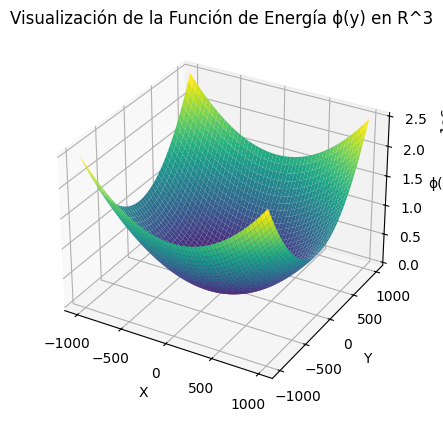

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función de energía cuadrática para visualización en R^3
def phi(y, A, b):
    return 0.5 * np.dot(y.T, np.dot(A, y)) - np.dot(y.T, b)

# Definir la matriz A y el vector b
A = np.array([[2, 0, 0], [0, 3, 0], [0, 0, 1]], dtype=float)
b = np.array([2, 3, 1], dtype=float)

# Crear una malla de puntos en R^3
x = np.linspace(-1000, 1000, 1000)
y = np.linspace(-1000, 1000, 1000)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Calcular los valores de la función de energía
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = phi(np.array([X[i, j], Y[i, j], 0]), A, b)

# Graficar la función de energía en R^3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Configurar etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('ϕ(y)')
ax.set_title('Visualización de la Función de Energía ϕ(y) en R^3')

plt.show()


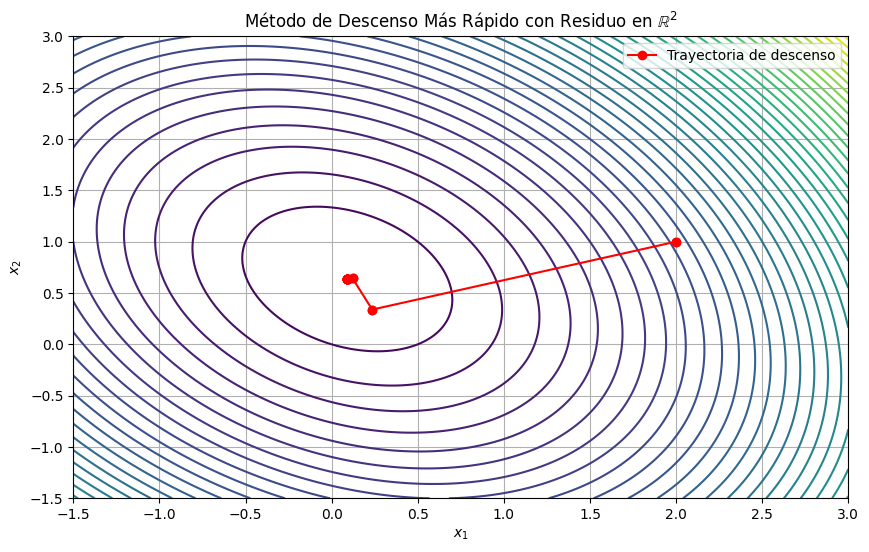

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la matriz A y el vector b
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])

# Parámetros iniciales
x0 = np.array([2.0, 1.0])  # Punto inicial
num_iterations = 10

# Almacenamos los puntos para visualización
points = [x0]
x = x0

for _ in range(num_iterations):
    r = b - A @ x
    alpha = np.dot(r, r) / np.dot(r, A @ r)
    x = x + alpha * r
    points.append(x)

points = np.array(points)

# Creación de la malla para la gráfica de contorno
x1 = np.linspace(-1.5, 3.0, 400)
x2 = np.linspace(-1.5, 3.0, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 * (4 * X1**2 + 2 * X1 * X2 + 3 * X2**2) - X1 - 2 * X2

# Gráfico de contorno
plt.figure(figsize=(10, 6))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.plot(points[:, 0], points[:, 1], 'ro-', label='Trayectoria de descenso')
plt.scatter(points[:, 0], points[:, 1], c='red')
plt.title('Método de Descenso Más Rápido con Residuo en $\\mathbb{R}^2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()


# GRADIENTE CONJUGADO

In [39]:
import numpy as np

def gradiente_conjugado(A, b, x0, tol=1e-10, max_iterations=1000):
    """
    Resuelve el sistema lineal Ax = b usando el método del gradiente conjugado.
    
    Parámetros:
    - A (np.array): Matriz de coeficientes del sistema.
    - b (np.array): Vector de términos independientes del sistema.
    - x0 (np.array): Vector inicial para las iteraciones.
    - tol (float): Tolerancia para el criterio de convergencia.
    - max_iterations (int): Número máximo de iteraciones permitidas.
    
    Retorna:
    - x (np.array): Solución del sistema Ax = b.
    """
    x = x0.copy()
    r = b - np.dot(A, x)
    rho = np.dot(r.T, r)
    k = 1
    r_norm = np.sqrt(rho)
    b_norm = np.linalg.norm(b)
    
    if r_norm <= tol * b_norm:
        return x
    
    p = r.copy()
    
    for k in range(1, max_iterations + 1):
        w = np.dot(A, p)
        alpha = rho / np.dot(p.T, w)
        x = x + alpha * p
        r = r - alpha * w
        rho_new = np.dot(r.T, r)
        r_norm = np.sqrt(rho_new)
        
        
        
        if r_norm <= tol * b_norm:
            break
        
        beta = rho_new / rho
        p = r + beta * p
        rho = rho_new
        print(f"Iteración {k}: x = {x}, Residual = {r}, Norma del residual = {r_norm} d = {alpha}")
    
    return x

# Definir la matriz A y el vector b
A = np.array([
    [0, 0, 1],
    [64, 8, 1],
    [256, 16, 1]
], dtype=float)
b = np.array([0, 320, 0], dtype=float)

# Multiplicar por A^T para obtener la nueva matriz y vector
A_T = A.T
A_new = np.dot(A_T, A)
b_new = np.dot(A_T, b)

# Vector inicial
x0 = np.array([-5.05, 80.05, 0], dtype=float)

# Solucionar usando el método del gradiente conjugado
solucion = gradiente_conjugado(A_new, b_new, x0)
print("La solución es:", solucion)


Iteración 1: x = [-5.0035134272 80.0530655516  0.0002116146], Residual = [ 0.0531865872 -0.7961825756 -0.1499113677], Norma del residual = 0.8119168214509878 d = 1.429828148720949e-05
Iteración 2: x = [-5.0000811741 80.0018811894 -0.0094258722], Residual = [ 0.0000712863 -0.0017095546  0.0091047737], Norma del residual = 0.009264154766577692 d = 0.06428829210794117
Iteración 3: x = [-5.0000000037 79.9999999998 -0.0000000001], Residual = [0.0002604726 0.0000172409 0.0000011978], Norma del residual = 0.00026104530744859697 d = 1.0374910308466432
La solución es: [-5. 80.  0.]
